In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel("groceries_data.xlsx")

In [ ]:
df.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.shape

(522064, 7)

In [ ]:
df.drop({'Quantity','Price','Country'},axis=1,inplace=True)
df.head(10)

,BillNo,Itemname,Date,CustomerID
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0
1,536365,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0
2,536365,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0
5,536365,SET 7 BABUSHKA NESTING BOXES,2010-12-01 08:26:00,17850.0
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0
7,536366,HAND WARMER UNION JACK,2010-12-01 08:28:00,17850.0
8,536366,HAND WARMER RED POLKA DOT,2010-12-01 08:28:00,17850.0
9,536367,ASSORTED COLOUR BIRD ORNAMENT,2010-12-01 08:34:00,13047.0


In [ ]:
df.dtypes

BillNo                object
Itemname              object
Date          datetime64[ns]
CustomerID           float64
dtype: object

In [ ]:
df.shape

(522064, 4)

In [ ]:
len(df['CustomerID'].unique())

4298

So we are having 4298 customers here.

In [ ]:
df['Itemname'].nunique()
#4185 unique items are present in the itemset

4185

In [ ]:
len(df['BillNo'].unique())

21663

We can see that we are having 21663 transactions in total.

In [ ]:
# Count occurrences of each item
item_counts = df['Itemname'].value_counts()
item_counts

Itemname
WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: count, Length: 4185, dtype: int64

In [ ]:
item_counts_df = pd.DataFrame({'Itemname': item_counts.index, 'Count': item_counts.values})
item_counts_df.tail(20)
#This gives the Itemname and the number of times it has occured in the transactions

,Itemname,Count
4165,Water damaged,1
4166,ZINC STAR T-LIGHT HOLDER,1
4167,reverse previous adjustment,1
4168,CAPIZ CHANDELIER,1
4169,16 PC CUTLERY SET PANTRY DESIGN,1
4170,LILY BROOCH WHITE/SILVER COLOUR,1
4171,on cargo order,1
4172,damages/dotcom?,1
4173,sold as set/6 by dotcom,1
4174,"PEARL & SHELL 42""NECKL. IVORY",1


In [ ]:
# Print items occurring less than 5 times
items_less_than = item_counts_df[item_counts_df['Count'] < 5]['Itemname']
for item in items_less_than:
    print(item)

ORIENTAL RED CUSHION COVER
BLUE TILED TRAY
ROBIN CHRISTMAS CARD
ANTIQUE RASPBERRY FLOWER EARRINGS
WHITE ALLIUM  ARTIFICIAL FLOWER
FLOWER PURPLE CLOCK WITH SUCKER
PINK FOXGLOVE ARTIIFCIAL FLOWER
LARGE JEWELLERY STAND
VINTAGE WOODEN BAR STOOL
MULTICOLOUR EASTER RABBIT
MISELTOE HEART WREATH
ARMY CAMO BOOKCOVER TAPE
GLASS AND BEADS BRACELET IVORY
YELLOW/PINK CERAMIC CANDLE HOLDER
WINE BOTTLE DRESSING LT.BLUE
FRENCH CHATEAU LARGE FRUIT BOWL
SET 10 CHRISTMAS CARDS HOHOHO 16956
FOLDING MIRROR HOT PINK
SET 10 CARDS PRINTED GRAPHIC 17219
VINTAGE ENGRAVED HEART
PINK BUNNY EASTER EGG BASKET
PINK ROUND COMPACT MIRROR
PEARL AND CHERRY QUARTZ BRACLET
MOP PENDANT SHELL NECKLACE
SET 10 CARD SNOWMAN 16965
ASSTD DESIGN BUBBLE GUM RING
PACK 20 DOLLY PEGS
CRACKED GLAZE NECKLACE IVORY
SET 10 CARDS SNOWY SNOWDROPS  17100
TURQUOISE CHRISTMAS TREE
SET 10 CARDS FILIGREE BAUBLE 16961
TUSCAN VILLA DOVECOTE
SILVER FLOWR PINK SHELL NECKLACE
SET 10 CARDS DAVID'S MADONNA 17074
CRACKED GLAZE EARRINGS IVORY
HOME SWEEE

In [ ]:
len(items_less_than)

650

#So we have 650 items whose occurence is less than 650

In [ ]:
# Convert 'Itemname' column to lowercase for comparison
df['Itemname'] = df['Itemname'].str.lower()
items_less_than = items_less_than.str.lower()

# Delete rows from main_df where Itemname is present in result_df
df = df[~df['Itemname'].isin(items_less_than)]

print(df)


        BillNo                             Itemname                Date  \
0       536365   white hanging heart t-light holder 2010-12-01 08:26:00   
1       536365                  white metal lantern 2010-12-01 08:26:00   
2       536365       cream cupid hearts coat hanger 2010-12-01 08:26:00   
3       536365  knitted union flag hot water bottle 2010-12-01 08:26:00   
4       536365       red woolly hottie white heart. 2010-12-01 08:26:00   
...        ...                                  ...                 ...   
522059  581587          pack of 20 spaceboy napkins 2011-12-09 12:50:00   
522060  581587          children's apron dolly girl 2011-12-09 12:50:00   
522061  581587         childrens cutlery dolly girl 2011-12-09 12:50:00   
522062  581587      childrens cutlery circus parade 2011-12-09 12:50:00   
522063  581587         baking set 9 piece retrospot 2011-12-09 12:50:00   

        CustomerID  
0          17850.0  
1          17850.0  
2          17850.0  
3          1785

In [ ]:
df.shape
#So we can see that the number of transaction has been reduced by 1586 tuples

(520478, 4)

In [ ]:
df.columns
# ['BillNo', 'Itemname', 'Date', 'CustomerID'

Index(['BillNo', 'Itemname', 'Date', 'CustomerID'], dtype='object')

In [ ]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Group by 'BillNo', 'CustomerID', and 'Date', and aggregate 'Itemname' into a list
grouped_df = df.groupby(['BillNo', 'CustomerID', pd.Grouper(key='Date', freq='D')])['Itemname'].agg(list).reset_index()
#type(grouped_df)
grouped_df

,BillNo,CustomerID,Date,Itemname
0,536365,17850.0,2010-12-01,"[white hanging heart t-light holder, white met..."
1,536366,17850.0,2010-12-01,"[hand warmer union jack, hand warmer red polka..."
2,536367,13047.0,2010-12-01,"[assorted colour bird ornament, poppy's playho..."
3,536368,13047.0,2010-12-01,"[jam making set with jars, red coat rack paris..."
4,536369,13047.0,2010-12-01,[bath building block word]
...,...,...,...,...
18142,581583,13777.0,2011-12-09,"[lunch bag red retrospot, 6 chocolate love hea..."
18143,581584,13777.0,2011-12-09,"[red flock love heart photo frame, 6 chocolate..."
18144,581585,15804.0,2011-12-09,"[black tea towel classic design, assorted bott..."
18145,581586,13113.0,2011-12-09,"[large cake stand hanging strawbery, set of 3..."


In [ ]:
grouped_df.shape

(18147, 4)

In [ ]:
dataset = [row['Itemname'] for _, row in grouped_df.iterrows()]
dataset

[['white hanging heart t-light holder',
  'white metal lantern',
  'cream cupid hearts coat hanger',
  'knitted union flag hot water bottle',
  'red woolly hottie white heart.',
  'set 7 babushka nesting boxes',
  'glass star frosted t-light holder'],
 ['hand warmer union jack', 'hand warmer red polka dot'],
 ['assorted colour bird ornament',
  "poppy's playhouse bedroom",
  "poppy's playhouse kitchen",
  'feltcraft princess charlotte doll',
  'ivory knitted mug cosy',
  'box of 6 assorted colour teaspoons',
  'box of vintage jigsaw blocks',
  'box of vintage alphabet blocks',
  'home building block word',
  'love building block word',
  'recipe box with metal heart',
  'doormat new england'],
 ['jam making set with jars',
  'red coat rack paris fashion',
  'yellow coat rack paris fashion',
  'blue coat rack paris fashion'],
 ['bath building block word'],
 ['alarm clock bakelike pink',
  'alarm clock bakelike red',
  'alarm clock bakelike green',
  'panda and bunnies sticker sheet',
  

In [ ]:
df_converted = pd.DataFrame(dataset)
df_converted

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
0,white hanging heart t-light holder,white metal lantern,cream cupid hearts coat hanger,knitted union flag hot water bottle,red woolly hottie white heart.,set 7 babushka nesting boxes,glass star frosted t-light holder,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,hand warmer union jack,hand warmer red polka dot,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,assorted colour bird ornament,poppy's playhouse bedroom,poppy's playhouse kitchen,feltcraft princess charlotte doll,ivory knitted mug cosy,box of 6 assorted colour teaspoons,box of vintage jigsaw blocks,box of vintage alphabet blocks,home building block word,love building block word,...,None,None,None,None,None,None,None,None,None,None
3,jam making set with jars,red coat rack paris fashion,yellow coat rack paris fashion,blue coat rack paris fashion,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,bath building block word,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,lunch bag red retrospot,6 chocolate love heart t-lights,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18143,red flock love heart photo frame,6 chocolate love heart t-lights,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
18144,black tea towel classic design,assorted bottle top magnets,victorian glass hanging t-light,embossed glass tealight holder,zinc willie winkie candle stick,rabbit night light,assorted colour bird ornament,multi colour silver t-light holder,grey heart hot water bottle,love hot water bottle,...,None,None,None,None,None,None,None,None,None,None
18145,large cake stand hanging strawbery,set of 3 hanging owls ollie beak,red retrospot round cake tins,doormat red retrospot,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df2 = pd.DataFrame(te_ary)
df2

,0,1,2,3,4,5,6,7,8,9,...,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
18145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_main = pd.DataFrame(te_ary , columns = te.columns_)
df_main

,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc herb garden container,zinc metal heart decoration,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
18145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
items_total = df_main.astype(bool).sum(axis=0)
items_total

10 colour spaceboy pen              237
12 coloured party balloons          136
12 daisy pegs in wood box            58
12 egg house painted wood            57
12 hanging eggs hand painted          7
                                   ... 
zinc t-light holder stars small     231
zinc top  2 door wooden shelf         9
zinc willie winkie  candle stick    184
zinc wire kitchen organiser          12
zinc wire sweetheart letter tray     19
Length: 3464, dtype: int64

In [ ]:
# count items in each row
items_per_transaction = df_main.astype(bool).sum(axis=1)
items_per_transaction

0         7
1         2
2        12
3         4
4         1
         ..
18142     2
18143     2
18144    21
18145     4
18146    15
Length: 18147, dtype: int64

In [ ]:
df_main = df_main[items_per_transaction > 1]
#df_main = df_main.astype(int)
df_main

,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc herb garden container,zinc metal heart decoration,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18144,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
18145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


So here we can see that the number of rows has been reduced.

# For Apriori Algorithm

In [ ]:
#Converted the series to a DataFrame so it becomes easy to visualize the data
col1 = pd.DataFrame(data=items_total.index, columns=['items'])
col2 = pd.DataFrame(data=items_total.values, columns=['count'])
df_items_total = pd.merge(col1, col2, left_index=True, right_index=True)
df_items_total

,items,count
0,10 colour spaceboy pen,237
1,12 coloured party balloons,136
2,12 daisy pegs in wood box,58
3,12 egg house painted wood,57
4,12 hanging eggs hand painted,7
...,...,...
3459,zinc t-light holder stars small,231
3460,zinc top 2 door wooden shelf,9
3461,zinc willie winkie candle stick,184
3462,zinc wire kitchen organiser,12


<ipython-input-30-c3e59a91517a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


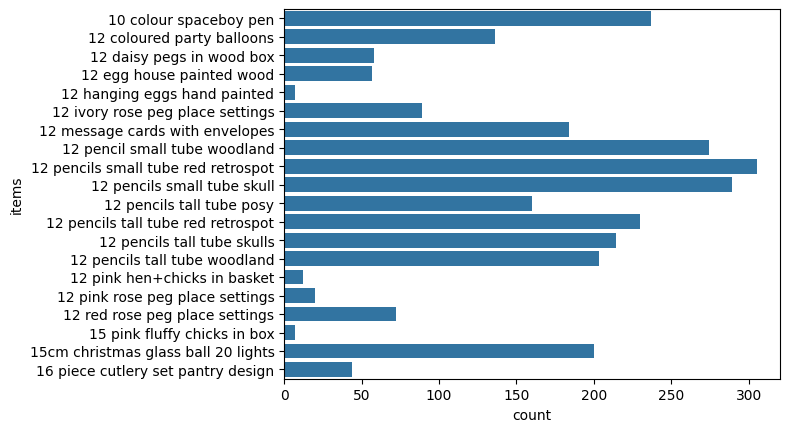

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(data=df_items_total.head(20), x='count', y='items', ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_main , min_support=0.02 , use_colnames=True)
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)
frequent_itemsets

,support,itemsets
0,0.023313,(3 stripey mice feltcraft)
1,0.020570,(4 traditional spinning tops)
2,0.042511,(6 ribbons rustic charm)
3,0.020033,(60 cake cases dolly girl design)
4,0.026711,(60 cake cases vintage christmas)
...,...,...
277,0.024267,"(pink regency teacup and saucer, roses regency..."
278,0.026175,"(white hanging heart t-light holder, red hangi..."
279,0.023074,"(regency cakestand 3 tier, roses regency teacu..."
280,0.027784,"(wooden picture frame white finish, wooden fra..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets , metric="confidence" , min_threshold = 0.8)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pink regency teacup and saucer),(green regency teacup and saucer),0.031064,0.038934,0.025757,0.829175,21.296964,0.024548,5.626016,0.983599
1,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.024267,0.038934,0.021643,0.891892,22.907827,0.020698,8.889861,0.980131
2,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.025757,0.043585,0.021643,0.840278,19.279260,0.020521,5.987992,0.973198


In [ ]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(pink regency teacup and saucer),(green regency teacup and saucer),0.031064,0.038934,0.025757,0.829175,21.296964,0.024548,5.626016,0.983599,1
1,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.024267,0.038934,0.021643,0.891892,22.907827,0.020698,8.889861,0.980131,2
2,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.025757,0.043585,0.021643,0.840278,19.279260,0.020521,5.987992,0.973198,2


In [ ]:
rules_df = pd.DataFrame(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# For FP-Growth Algorithm


In [ ]:
# FP-Growth Algorithm
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = fpgrowth(df_main , min_support=0.02 , use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.113344,(white hanging heart t-light holder)
1,0.026294,(hand warmer union jack)
2,0.080849,(assorted colour bird ornament)
3,0.040425,(home building block word)
4,0.032495,(love building block word)
...,...,...
277,0.021226,"(lunch bag suki design, lunch bag apple design)"
278,0.020630,"(jumbo bag red retrospot, jumbo bag apples)"
279,0.022657,"(spotty bunting, party bunting)"
280,0.020272,"(jumbo bag vintage leaf, jumbo bag red retrospot)"


In [ ]:
frequent_itemsets_df =pd.DataFrame(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules2 = association_rules(frequent_itemsets , metric = "confidence" , min_threshold = 0.8)
rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pink regency teacup and saucer),(green regency teacup and saucer),0.031064,0.038934,0.025757,0.829175,21.296964,0.024548,5.626016,0.983599
1,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.024267,0.038934,0.021643,0.891892,22.907827,0.020698,8.889861,0.980131
2,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.025757,0.043585,0.021643,0.840278,19.279260,0.020521,5.987992,0.973198


In [ ]:
rules2["antecedent_len"] = rules2["antecedents"].apply(lambda x: len(x))
rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(pink regency teacup and saucer),(green regency teacup and saucer),0.031064,0.038934,0.025757,0.829175,21.296964,0.024548,5.626016,0.983599,1
1,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.024267,0.038934,0.021643,0.891892,22.907827,0.020698,8.889861,0.980131,2
2,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.025757,0.043585,0.021643,0.840278,19.279260,0.020521,5.987992,0.973198,2


In [ ]:
%timeit apriori(df_main,min_support = 0.02)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5.78 s ± 329 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit fpgrowth(df_main, min_support = 0.02)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.65 s ± 230 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
